<a href="https://colab.research.google.com/github/Jasleen8801/Computational-Statistics/blob/main/LabAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# Connecting with Google Drive
# from google.colab import files
# uploaded = files.upload()

Saving 50_Startups.csv to 50_Startups.csv
Saving Advertising.csv to Advertising.csv
Saving Car_sales.csv to Car_sales.csv
Saving data.csv to data.csv
Saving gray_img.jpg to gray_img.jpg


In [4]:
# Modules Imported
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statistics
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

# Simple Linear Regression

In [31]:
class SimpleLinearRegression:
  def __init__(self) -> None:
    self.Xm = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    self.ym = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12])
    self.data = pd.read_csv("Salary_Data.csv")

  def _regrr_coeff(self, X, y):
    n = len(X)
    mean_x = statistics.mean(X)
    mean_y = statistics.mean(y)
    SS_xy = sum(y*X) - n*mean_y*mean_x
    SS_xx = sum(X*X) - n*mean_x*mean_y
    b_1 = SS_xy / SS_xx
    b_0 = mean_y - b_1 * mean_x
    return (b_0, b_1)

  def _coeff_of_determination(self, X, y):
    n = len(X)
    r2_num = (n*sum(X*y) - sum(X)*sum(y))**2
    r2_den = (n*sum(X*X) - (sum(X))**2) * (n*sum(y*y) - (sum(y))**2)
    r_2 = r2_num / r2_den
    return r_2

  def SLR_1(self):
    b = self._regrr_coeff(self.Xm, self.ym)
    print("Estimated coefficients; \n b_0 = {} \n b_1 = {}".format(b[0], b[1]))
    print(f"Coefficient of Determination: {self._coeff_of_determination(self.Xm, self.ym)}")
      
  def SLR_2(self):
    X = self.data['YearsExperience']
    y = self.data['Salary']
    X = ((X - X.min())/(X.max() - X.min()))
    y = ((y - y.min())/(y.max() - y.min()))
    b = self._regrr_coeff(X, y)
    print("Estimated coefficients:\n b_0 = {}  \n b_1 = {}".format(b[0], b[1]))
    print(f"Coefficient of Determination: {self._coeff_of_determination(X, y)}")

  def SLR_3(self):
    self.Xm = self.Xm.reshape((-1, 1))
    model = LinearRegression().fit(self.Xm, self.ym)
    print(f"Coefficient of Determination: {model.score(self.Xm, self.ym)}")
    print(f"Intercept: {model.intercept_}")
    print(f"Slope: {model.coef_}")

  def SLR_4(self):
    X = np.array(self.data['YearsExperience']).reshape((-1, 1))
    y = np.array(self.data['Salary'])
    X = ((X - X.min())/(X.max() - X.min()))
    y = ((y - y.min())/(y.max() - y.min()))
    model = LinearRegression().fit(X, y)
    print(f"Coefficient of Determination: {model.score(X, y)}")
    print(f"Intercept: {model.intercept_}")
    print(f"Slope: {model.coef_}")

  def choose(self, val):
    default = "Incorrect Input"
    return getattr(self, 'SLR_' + str(val), lambda: default)()

In [32]:
def SimpleLinearRegression():
  object = SimpleLinearRegression()
  print("*******SIMPLE LINEAR REGRESSION*******")
  print("Press 1 to perform SLR using Manual Calculation of a random dataset")
  print("Press 2 to perform SLR using Manual Calculation of a Kaggle dataset")
  print("Press 3 to perform SLR using Inbuilt Python Function of a random dataset")
  print("Press 4 to perform SLR using Inbuilt Python Function of a Kaggle dataset")
  val = int(input("Enter the value to perform corresponding function: "))
  object.choose(val)

*******SIMPLE LINEAR REGRESSION*******
Press 1 to perform SLR using Manual Calculation of a random dataset
Press 2 to perform SLR using Manual Calculation of a Kaggle dataset
Press 3 to perform SLR using Inbuilt Python Function of a random dataset
Press 4 to perform SLR using Inbuilt Python Function of a Kaggle dataset
Enter the value to perform corresponding function: 1
Estimated coefficients; 
 b_0 = -7.244444444444444 
 b_1 = 3.311111111111111
Coefficient of Determination: 0.952538038613988


# Variance Inflation Factor

In [ ]:
class VarianceInflationFactor:
  def __init__(self) -> None:
    self.data = pd.read_csv("Car_sales.csv").dropna()

  def _compute_vif1(self, x1, x2):
    corr_matrix = np.corrcoef(x1, x2)
    corr = corr_matrix[0,1]
    r_sq = corr**2
    vif = 1 / (1 - r_sq)
    print(f"VIF-> {vif}")
    # print(r_sq)

  def _compute_vif2(self, considered_features):
    X = self.data[considered_features]
    X['intercept'] = 1
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable'] != 'intercept']
    print(vif)

  def VIF_1(self):
    considered_features = ['Fuel_efficiency', 'Power_perf_factor', 'Engine_size', 'Horsepower', 'Fuel_capacity', 'Curb_weight']
    for i in considered_features:
      for j in considered_features:
        if(i != j):
          print(f"{i} and {j}")
          self._compute_vif1(self.data[i], self.data[j])

  def VIF_2(self):
    plt.figure(figsize=(10, 7))
    mask = np.triu(np.ones_like(self.data.corr(), dtype=bool))
    sns.heatmap(self.data.corr(), annot=True, mask=mask, vmin=-1, vmax=1)
    plt.title("Correlation Coefficient of Predictors")
    plt.show()
    considered_features = ['Fuel_efficiency', 'Power_perf_factor', 'Engine_size', 'Horsepower', 'Fuel_capacity', 'Curb_weight']
    self._compute_vif2(considered_features)

  def choose(self, val):
    default = "Incorrect Input"
    return getattr(self, 'VIF_' + str(val), lambda: default)()


*******VARIANCE INFLATION FACTOR*******
Press 1 to perform VIF using Manual Calculation
Press 2 to perform VIF using Inbuilt Python Function
Enter the value to perform corresponding function: 2


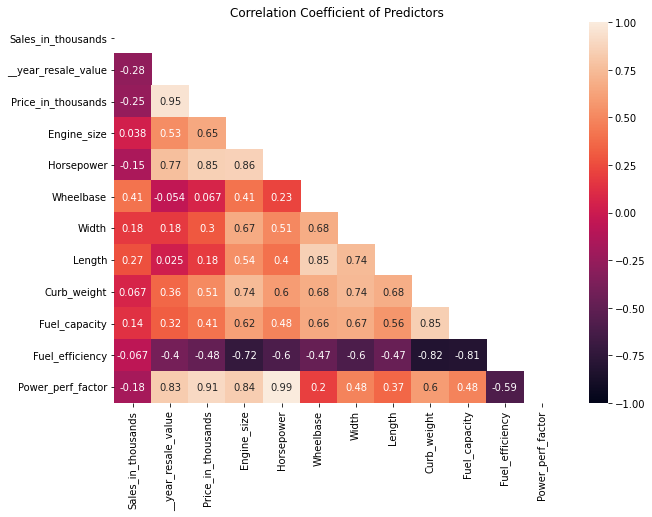

            Variable         VIF
0    Fuel_efficiency    4.004185
1  Power_perf_factor   97.177100
2        Engine_size    6.721330
3         Horsepower  111.471081
4      Fuel_capacity    4.282718
5        Curb_weight    5.353387


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [83]:
def VarianceInflationFactor():
  object = VarianceInflationFactor()
  print("*******VARIANCE INFLATION FACTOR*******")
  print("Press 1 to perform VIF using Manual Calculation")
  print("Press 2 to perform VIF using Inbuilt Python Function")
  val = int(input("Enter the value to perform corresponding function: "))
  object.choose(val)

# Multiple Linear Regression

[Deriving Normal Equation in Multivariate Linear Regression](https://eli.thegreenplace.net/2014/derivation-of-the-normal-equation-for-linear-regression)

<img src="https://miro.medium.com/max/280/1*xMoP9IyWFSJn2D0JfU-ZQw.png">

In [ ]:
class MultipleLinearRegression:
  def __init__(self) -> None:
    self.data = pd.read_csv('Real estate.csv')
    self.coefficients = []
      
  def MLR_1(self):
    X = self.data.iloc[:, 2:-1] # columns with index 2 to 6 as features in X
    Y = self.data.iloc[:, -1] # the last column i.e. 'price per unit area' as target

    one = np.ones((len(X),1))
    X = np.append(one, X, axis=1) # adding ones to X
    Y = np.array(Y).reshape((len(Y),1)) # reshape Y to a column vector
    self.coefficients = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
    print(f"Coefficients: {self.coefficients}")

  def MLR_2(self):
    X = self.data.iloc[:, 2:-1] 
    Y = self.data.iloc[:, -1] 
    mlr = LinearRegression()
    mlr.fit(X,Y)
    print(f"Coefficients: {list(zip(X, mlr.coef_))}")

  def choose(self, val):
    default = "Incorrect Input"
    return getattr(self, 'MLR_' + str(val), lambda: default)()

In [34]:
def MultipleLinearRegression():
  object = MultipleLinearRegression()
  print("*******MULTIPLE LINEAR REGRESSION*******")
  print("Press 1 to perform MLR using Normal Equation Method")
  print("Press 2 to perform MLR using Inbuilt Python Function")
  val = int(input("Enter the value to perform corresponding function: "))
  object.choose(val)

# Confusion Matrix

In [ ]:
class ConfusionMat:
  def __init__(self) -> None:
    self.params = []
    self.actual = [1, 3, 3, 2, 5, 5, 3, 2, 1, 4, 3, 2, 1, 1, 2]
    self.predicted = [1, 2, 3, 4, 2, 3, 3, 2, 1, 2, 3, 1, 5, 1, 1]
    self.confusion_matrix = self.comp_confmat()

  def totalSum(self):
    '''to calculate total sum of elements in a confusion matrix'''
    tot_sum = 0
    for i in range(0, len(self.confusion_matrix)):
        for j in range(0, len(self.confusion_matrix)): 
            tot_sum += self.confusion_matrix[i][j]
    return tot_sum

  def param(self, mat, n):
    '''to calculate the values of parameters in each class'''
    col_sum = [sum([row[i] for row in mat]) for i in range(0,len(mat[0]))]
    row_sum = [sum(mat[i]) for i in range(len(mat))]
    tp = mat[n][n]
    fp = row_sum[n] - tp
    fn = col_sum[n] - tp
    tn = self.totalSum() - fp - fn - tp
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    self.params.append(accuracy)
    precision = tp / (tp + fp)
    self.params.append(precision)
    recall = tp / (tp + fn)
    self.params.append(recall)
    f1_score = (2 * precision * recall) / (precision + recall)
    self.params.append(f1_score)
    return self.params

  def display_val(self):
    '''to display the required values'''
    for i in range(len(self.confusion_matrix)):
        print(f"For the class {i+1}, the values are as follows: ")
        print(f"Accuracy: {self.param(self.confusion_matrix,i)[0]}")
        print(f"Precision: {self.param(self.confusion_matrix,i)[1]}")
        print(f"Recall: {self.param(self.confusion_matrix,i)[2]}")
        print(f"F1-Score: {self.param(self.confusion_matrix,i)[3]}")
        print("*********************")

  def comp_confmat(self):
    '''to find the confusion matrix using actual and predicted values'''
    # extract the different classes
    classes = np.unique(self.actual)
    # initialize the confusion matrix
    confmat = np.zeros((len(classes), len(classes)))
    # loop across the different combinations of actual / predicted classes
    for i in range(len(classes)):
        for j in range(len(classes)):
            # count the number of instances in each combination of actual / predicted classes
            confmat[i, j] = np.sum((self.actual == classes[i]) & (self.predicted == classes[j]))
    return confmat

In [35]:
def ConfusionMatrix():
  conMat = ConfusionMat()
  conMat.display_val()

# Noise Matrix

In [ ]:
class NoiseMatrix:
  def __init__(self):
    self.image = mpimg.imread('gray_img.jpg')
    self.new_data = []

  def rgb2grayImage(self):
    R, G, B = self.image[:,:,0], self.image[:,:,1], self.image[:,:,2]
    self.imgGray = 0.2989*R + 0.5870*G + 0.1140*B
    # plt.imshow(self.imgGray, cmap='gray')
    # plt.show()
    # return self.imgGray

  def addNoise(self):
    var = int(input("Enter the variance (for Normal Distribution) you want to add: "))
    self.rgb2grayImage()
    noise = np.random.normal(0, var, self.imgGray.shape)
    self.new_data = noise + self.imgGray

  def displayImage(self, data):
    plt.imshow(data, cmap='gray')

In [36]:
def NoiseMatrix():
  object = NoiseMatrix()
  object.addNoise()
  object.displayImage(object.new_data)

# Simple Linear Regression using Gradient Descent

In [ ]:
class GradientDescentSLR:
  def __init__(self, learning_rate=0.01, iter=10):
    self.learning_rate = learning_rate
    self.iter = iter

  def fit(self, X, y):
    b_0, b_1 = 0, 0
    for i in range(iter):
      temp_0 = b_0 - (self.learning_rate/len(X)) * sum(b_0 + b_1*X - y)
      temp_1 = b_1 - (self.learning_rate/len(X)) * sum((b_0 + b_1*X - y) * X)
      b_0 = temp_0
      b_1 = temp_1
      print(f"For iteration {i+1}: b_0 = {temp_0*1000} and b_1 = {temp_1*1000}")

In [37]:
def SLRusingGradientDescent():
  object = GradientDescentSLR()
  X = np.array([2, 3, 5, 13, 8, 16, 11, 1, 9])
  Y = np.array([15, 28, 42, 64, 50, 90, 58, 8, 54])
  object.fit(X,Y)

# Multiple Linear Regression using Gradient Descent

In [ ]:
class GradientDescentMLR:
  def __init__(self, learning_rate=0.01, iters=2) -> None:
    self.learning_rate = learning_rate
    self.iters = iters

  def fit(self, X1, X2, Y):
    ones = np.ones(len(X1))
    features = np.c_[ones, X1, X2]
    known_labels = np.array(Y).reshape((len(Y),1))
    weights = np.zeros(features.shape[1])
    temp = weights
    for i in range(self.iters):
      temp[0] = weights[0] - (self.learning_rate/len(X1)) * np.sum((features @ weights) - known_labels.transpose())
      for j in range(1, len(weights)):
        temp[j] = weights[j] - (self.learning_rate/len(X1)) * ((features @ weights) - known_labels.transpose()) @ features.transpose()[j]
      for k in range(len(weights)):
        weights[k] = temp[k]
        print(f"For iteration {i+1}: \nb_{k} = {weights[k]}\n")


In [38]:
def MLRusingGradientDescent():
  object = GradientDescentMLR()
  X1 = np.array([2.75, 2.5, 2.25, 2, 2, 2, 1.75, 1.75])
  X2 = np.array([5.3, 5.3, 5.5, 5.7, 5.9, 6, 5.9, 6.1])
  y = np.array([1464, 1394, 1159, 1130, 1075, 1047, 965, 719])
  object.fit(X1,X2,y)

# Principal Component Analysis

In [ ]:
class PrincipalComponentAnalysis:
  def __init__(self, data) -> None:
    self.data = data

  def standardize_data(self):
    standardized_data = (self.data - self.data.mean(axis=0)) / self.data.std(axis=0)
    return standardized_data

  def fit(self):
    covariance_matrix = np.cov(self.standardize_data(), ddof=0, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    order_of_importance = np.argsort(eigenvalues)[::-1]

    sorted_eigenvalues = eigenvalues[order_of_importance]
    sorted_eigenvectors = eigenvectors[:,order_of_importance]

    explained_variance = sorted_eigenvalues / np.sum(sorted_eigenvalues)

    k = 2 # No. of Principal Components
    reduced_data = np.matmul(self.standardize_data(), sorted_eigenvectors[:,:k])
    print(reduced_data)

In [39]:
def PrincipalComponentAnalysis():
  data = data = np.array([
      [   1,   2,  -1,   4,  10],
      [   3,  -3,  -3,  12, -15],
      [   2,   1,  -2,   4,   5],
      [   5,   1,  -5,  10,   5],
      [   2,   3,  -3,   5,  12],
      [   4,   0,  -3,  16,   2],
  ])
  object = PrincipalComponentAnalysis(data)
  object.fit()

# Main Program

In [40]:
def choice(i):
  switcher = {
      1: SimpleLinearRegression,
      2: VarianceInflationFactor,
      3: MultipleLinearRegression,
      4: ConfusionMatrix,
      5: NoiseMatrix,
      6: SLRusingGradientDescent,
      7: MLRusingGradientDescent,
      8: PrincipalComponentAnalysis,
      9: exit
  }
  switcher[i]()

In [41]:
print("*******MAIN PROGRAM*******")
print("Press 1 to perform Simple Linear Regression.")
print("Press 2 to find the Variance Inflation Factor.")
print("Press 3 to perform Multiple Linear Regression.")
print("Press 4 to perform Confusion Matrix Operation.")
print("Press 5 to perform Noise Matrix operation.")
print("Press 6 to perform Gradient Descent program.")
print("Press 7 to perform MLR using Gradient Descent.")
print("Press 8 to perform PCA - Principal Component Analysis")
print("Press 9 to exit the program.")
i = int(input("Enter the value to perform corresponding functions: "))
choice(i)

*******MAIN PROGRAM*******
Press 1 to perform Simple Linear Regression.
Press 2 to find the Variance Inflation Factor.
Press 3 to perform Multiple Linear Regression.
Press 4 to perform Confusion Matrix Operation.
Press 5 to perform Noise Matrix operation.
Press 6 to perform Gradient Descent program.
Press 7 to perform MLR using Gradient Descent.
Press 8 to perform PCA - Principal Component Analysis
Press 9 to exit the program.
Enter the value to perform corresponding functions: 2
